# Работа с категорийными(категориальными) данными (Categorical Data)
Многие методы машинного обучения не могут работать с категорийными(категориальными) данными, представленными в виде текстовых значений. Например, линейная регрессия не может вычислить коэффициент $\beta$ для признака со значениями цветов - 'red', 'blue' и т.д. Вместо этого нам нужно сконвертировать такие категории в специальные числовые переменные.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../DATA/Ames_NO_Missing_Data.csv")
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [6]:
with open('../DATA/Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [10]:
df.isnull().sum() > 0

MS SubClass       False
MS Zoning         False
Lot Frontage      False
Lot Area          False
Street            False
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 76, dtype: bool

## Числовые колонки для категорий
При переводе категорийных значений в числовые значения нужно быть аккуратным и следить за тем, что числовые связи имеют смысл для модели. Например, числа в колонке **MSSubClass** - это просто некоторый код для каждого класса:
    
    MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
        150	1-1/2 STORY PUD - ALL AGES
        160	2-STORY PUD - 1946 & NEWER
        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
        190	2 FAMILY CONVERSION - ALL STYLES AND AGES

Здесь каждое число не связано с другими числами в этой же колонке. Например, 30 > 20, однако это не значит, что значение "1-STORY 1945 & OLDER" в каком-то смысле больше значения "1-STORY 1946 & NEWER ALL STYLES". Хотя в других случаях вполне может быть, что например в поезде 1й класс и 2й класс вагонов действительно идут по порядку, если назначить им числа 1 и 2. 

**Необходимо всегда изучать данные перед тем, как делать какие-то преобразования.**

In [12]:
# Конвертируем числа в строку.
df['MS SubClass'] = df['MS SubClass'].apply(str)

## Создание "Dummy"-переменных
### Как избежать мультиколлинеарности (наличия линейной зависимости между переменными) и ситуации "Dummy Variable Trap"
https://stats.stackexchange.com/questions/144372/dummy-variable-trap

In [15]:
direction = pd.Series(['Up', 'Up', 'Down'])
direction

0      Up
1      Up
2    Down
dtype: object

In [17]:
pd.get_dummies(direction, dtype=int)

,Down,Up
0,0,1
1,0,1
2,1,0


Здесь, методу `.get_dummies()` передается объект *Series*, в котором указаны категории. На выходе, получается датафрейм с таким же количеством строк, а количество колонок равно количеству различных категорий.

**Важно: эти две колнки дублируют друг-друга, поэтому, любую из этих колонок можно удалить - но количество информации при этом не уменьшится.**

В метод `.get_dummies()` можно передавать не один объект *Series*, а список из таких объектов.

In [20]:
pd.get_dummies(direction, dtype=int, drop_first=True)

,Up
0,1
1,1
2,0


## Создание Dummy-переменных на основе колонок
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   object 
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Lot Shape        2925 non-null   object 
 6   Land Contour     2925 non-null   object 
 7   Utilities        2925 non-null   object 
 8   Lot Config       2925 non-null   object 
 9   Land Slope       2925 non-null   object 
 10  Neighborhood     2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built    

In [24]:
# Выберем только текстовые колонки
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,WD,Normal
2921,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
2922,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,WD,Normal
2923,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [28]:
# Сохраним датафрейм, состоящий только из текстовых колонок
my_object_df = df.select_dtypes(include='object')
# Сохраним датафрейм, который состоит НЕ из текстовых колонок
my_nums_df = df.select_dtypes(exclude='object')

In [30]:
my_object_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    1152 non-null   object
 18  Exter Qu

In [32]:
my_nums_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2925 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Overall Qual     2925 non-null   int64  
 3   Overall Cond     2925 non-null   int64  
 4   Year Built       2925 non-null   int64  
 5   Year Remod/Add   2925 non-null   int64  
 6   Mas Vnr Area     2925 non-null   float64
 7   BsmtFin SF 1     2925 non-null   float64
 8   BsmtFin SF 2     2925 non-null   float64
 9   Bsmt Unf SF      2925 non-null   float64
 10  Total Bsmt SF    2925 non-null   float64
 11  1st Flr SF       2925 non-null   int64  
 12  2nd Flr SF       2925 non-null   int64  
 13  Low Qual Fin SF  2925 non-null   int64  
 14  Gr Liv Area      2925 non-null   int64  
 15  Bsmt Full Bath   2925 non-null   float64
 16  Bsmt Half Bath   2925 non-null   float64
 17  Full Bath     

Так как исходный датафрейм разбит на два, теперь можно взять датафрейм с текстовыми колонками и преобразуем их в Dummy-переменные. После этого, добавим к полученным колонкам все остальные, не текстовые колонки, таким образом сформируется финальный датафрейм.

Существует несколько вариантов такого преобразования:

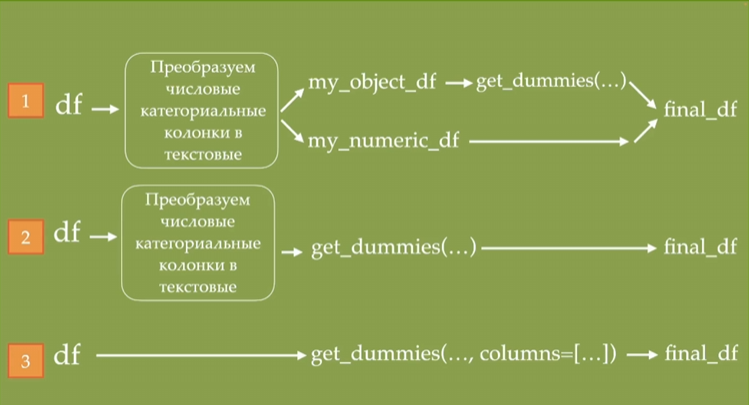

### Ковертация

In [36]:
df_objects_dummies = pd.get_dummies(my_object_df, drop_first=True, dtype=int)

In [38]:
df_objects_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2921,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2923,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [44]:
final_df = pd.concat([df_objects_dummies, my_nums_df], axis=1)

In [46]:
final_df

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,210,62,0,0,0,0,0,5,2010,215000
1,0,0,0,0,1,0,0,0,0,0,...,140,0,0,0,120,0,0,6,2010,105000
2,0,0,0,0,1,0,0,0,0,0,...,393,36,0,0,0,0,12500,6,2010,172000
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,2010,244000
4,0,0,0,0,0,0,0,0,0,1,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,0,0,0,0,0,0,0,0,0,0,...,120,0,0,0,0,0,0,3,2006,142500
2921,0,0,0,0,1,0,0,0,0,0,...,164,0,0,0,0,0,0,6,2006,131000
2922,0,0,0,0,0,0,0,0,0,0,...,80,32,0,0,0,0,700,7,2006,132000
2923,0,0,0,0,1,0,0,0,0,0,...,240,38,0,0,0,0,0,4,2006,170000


## Резюме
Важно: мы не можем знать, будут ли полезны все полученые колонки. Большее количество колонок может и не привести к улучшенным результатам. Возможно придется удалить некоторые колонки, или использовать модель с регуляризацией для выбора только важных колонок. Сейчас же, получилось значительно увеличить соотношение колонок и строк, и это может снизить точность модели (однако это не возможно узнать до тех пор, пока не провести сравнение разных моделей и подходов).

In [53]:
final_df.corr(numeric_only=True)['SalePrice'].sort_values()

Exter Qual_TA        -0.591459
Kitchen Qual_TA      -0.527461
Bsmt Qual_TA         -0.453022
Garage Finish_Unf    -0.422363
Garage Type_Detchd   -0.365209
                        ...   
Garage Cars           0.648488
Total Bsmt SF         0.660983
Gr Liv Area           0.727279
Overall Qual          0.802637
SalePrice             1.000000
Name: SalePrice, Length: 263, dtype: float64

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

Эту колонку скорее всего заполнял риелтор, а это значит, что эта колонка может содержать обобщённую информацию с других признаков. Но если бы мы захотели использовать этот признак для предсказывания цены дома, то для каждого нового дома для применения нашей модели нам пришлось бы спрашивать риелтора!

In [57]:
final_df.to_csv('AMES_Final_DF.csv')

---